In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
pd.options.display.max_rows = 16


In [9]:
federal = pd.read_csv('USFR_StmtNetCost_all_years.csv') #importing file with data

In [10]:
federal


,Record Date,Agency Name,Gross Cost (in Billions),Earned Revenue (in Billions),Subtotal (in Billions),Change in Assumptions (in Billions),Net Cost (in Billions),Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2001-09-30,General Services Administration,0.1,0.3,NaN,NaN,-0.2,19,2001,4,2001,3,9,30
1,2001-09-30,Department of Energy,27.0,5.2,NaN,NaN,21.8,5,2001,4,2001,3,9,30
2,2001-09-30,Agency for International Development,7.1,0.1,NaN,NaN,7.0,16,2001,4,2001,3,9,30
3,2001-09-30,Export-Import Bank of the United States,0.8,0.3,NaN,NaN,0.5,26,2001,4,2001,3,9,30
4,2001-09-30,Small Business Administration,0.8,0.2,NaN,NaN,0.6,24,2001,4,2001,3,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,2019-09-30,General Services Administration,0.1,0.8,-0.7,NaN,-0.7,38,2019,4,2019,3,9,30
717,2019-09-30,Department of Housing and Urban Development,29.6,1.8,27.8,NaN,27.8,17,2019,4,2019,3,9,30
718,2019-09-30,Securities and Exchange Commission,1.8,2.1,-0.3,NaN,-0.3,35,2019,4,2019,3,9,30
719,2019-09-30,Department of Veterans Affairs,364.7,5.1,359.6,58.0,417.6,4,2019,4,2019,3,9,30


In [11]:
net_cost = federal["Net Cost (in Billions)"].tolist()

In [12]:
net_cost

[-0.2,
 21.8,
 7.0,
 0.5,
 0.6,
 434.5,
 2545.8,
 63.3,
 24.2,
 16.6,
 7.9,
 0.2,
 9.1,
 193.3,
 4.9,
 465.0,
 11.4,
 3.7,
 0.2,
 6.2,
 8.2,
 35.8,
 2.6,
 764.2,
 42.3,
 9.0,
 20.6,
 1.5,
 217.7,
 4.7,
 55.6,
 32.1,
 72.4,
 9.0,
 -0.1,
 14.3,
 1.1,
 22.0,
 175.4,
 0.2,
 34.1,
 5.7,
 16.7,
 14.6,
 -1.5,
 -0.3,
 62.4,
 64.7,
 10.0,
 406.5,
 70.9,
 63.8,
 215.8,
 0.2,
 11.8,
 45.1,
 -7.8,
 2259.7,
 6.2,
 27.2,
 -0.4,
 0.8,
 472.9,
 7.7,
 1.1,
 4.2,
 4.4,
 8.0,
 492.6,
 9.3,
 13.9,
 12.8,
 173.6,
 7.5,
 3.1,
 512.3,
 1.2,
 0.3,
 5.9,
 9.1,
 24.9,
 11.3,
 2485.5,
 -0.4,
 68.1,
 -3.3,
 84.9,
 72.4,
 -0.2,
 30.9,
 512.9,
 10.2,
 156.8,
 4.8,
 29.4,
 0.5,
 63.0,
 11.3,
 42.1,
 54.0,
 1.7,
 9.6,
 -0.3,
 549.9,
 11.1,
 0.2,
 0.3,
 0.1,
 59.1,
 -14.0,
 12.6,
 8.4,
 7.7,
 40.0,
 158.3,
 0.6,
 -1.4,
 10.6,
 -0.5,
 0.3,
 19.5,
 56.1,
 9.3,
 16.6,
 1.6,
 75.2,
 9.2,
 5.2,
 40.5,
 22.4,
 6.8,
 17.2,
 13.0,
 2524.9,
 34.6,
 550.5,
 58.6,
 532.3,
 649.8,
 47.9,
 76.5,
 22.7,
 -2.7,
 9.5,
 8.9,
 50.0,
 2

In [18]:
np.isnan(net_cost)



array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [21]:
B_array = net_cost

for x in range(size_array):
    if np.isnan(B_array[x]) == True:
        B_array[x] = 0

In [22]:
B_array = net_cost

size_array = len(B_array)
for x in range(size_array):
    y = str(abs(B_array[x]))
    B_array[x] = int(y[0])
    
    
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
seven = 0
eight = 0 
nine = 0
zero = 0

for x in range(size_array):
    if B_array[x] == 1:
        one  +=  1
    elif B_array[x] == 2:
        two += 1
    elif B_array[x] == 3:
        three += 1
    elif B_array[x] == 4:
        four += 1
    elif B_array[x] == 5:
        five += 1
    elif B_array[x] == 6:
        six += 1
    elif B_array[x] == 7:
        seven += 1
    elif B_array[x] == 8:
        eight += 1
    elif B_array[x] == 9:
        nine += 1
    elif B_array[x] == 0:
        zero += 1
    

[169, 74, 46, 58, 51, 45, 52, 42, 43]
580


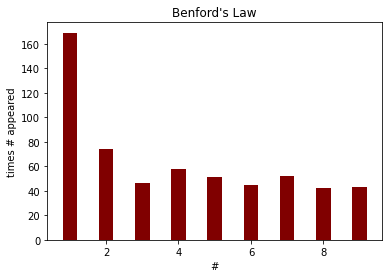

In [23]:
Benford_assortment = [one, two, three, four, five, six, seven, eight, nine]
Numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
print(Benford_assortment)
print(sum(Benford_assortment))

pp.bar(Numbers, Benford_assortment , color ='maroon',  
        width = 0.4) 
  
pp.xlabel("#") 
pp.ylabel("times # appeared") 
pp.title("Benford's Law") 
pp.show() 